<a href="https://colab.research.google.com/github/KillerStrike17/EVA/blob/master/YOLO/YOLO_Football_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Wed Feb 12 08:23:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Cloning repo's and Mounting Drives

In [0]:
!git clone https://github.com/rafiuddinkhan/Yolo-Training-GoogleColab.git

Cloning into 'Yolo-Training-GoogleColab'...
remote: Enumerating objects: 349, done.
remote: Total 349 (delta 0), reused 0 (delta 0), pack-reused 349
Receiving objects: 100% (349/349), 136.16 MiB | 50.89 MiB/s, done.
Resolving deltas: 100% (105/105), done.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 12441, done.
remote: Total 12441 (delta 0), reused 0 (delta 0), pack-reused 12441
Receiving objects: 100% (12441/12441), 11.38 MiB | 21.62 MiB/s, done.
Resolving deltas: 100% (8488/8488), done.


In [0]:
! cp drive/My\ Drive/Dataset/YOLO\ Dataset/data_for_colab.zip /content/darknet

In [0]:
cd darknet

/content/darknet


In [0]:
!ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     scripts
appveyor.yml  DarknetConfig.cmake.in  include		     src
build	      darknet.py	      json_mjpeg_streams.sh  video_v2.sh
build.ps1     darknet_video.py	      LICENSE		     video_yolov3.sh
build.sh      data		      Makefile
cfg	      data_for_colab.zip      net_cam_v3.sh
cmake	      image_yolov2.sh	      README.md


## Loading the Dataset

Unzipping the dataset

In [0]:
!unzip data_for_colab.zip

Archive:  data_for_colab.zip
   creating: data_for_colab/
  inflating: data_for_colab/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/data_for_colab/
  inflating: __MACOSX/data_for_colab/._.DS_Store  
   creating: data_for_colab/data/
  inflating: data_for_colab/data/.DS_Store  
   creating: __MACOSX/data_for_colab/data/
  inflating: __MACOSX/data_for_colab/data/._.DS_Store  
  inflating: data_for_colab/data/100.jpg  
  inflating: __MACOSX/data_for_colab/data/._100.jpg  
  inflating: data_for_colab/data/100.txt  
  inflating: data_for_colab/data/101.jpg  
  inflating: __MACOSX/data_for_colab/data/._101.jpg  
  inflating: data_for_colab/data/101.txt  
  inflating: data_for_colab/data/102.jpg  
  inflating: __MACOSX/data_for_colab/data/._102.jpg  
  inflating: data_for_colab/data/102.txt  
  inflating: data_for_colab/data/11.png  
  inflating: __MACOSX/data_for_colab/data/._11.png  
  inflating: data_for_colab/data/11.txt  
  inflating: data_for_colab/data/12.jpg  
  inflating: 

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!ls

darknet  sample_data  Yolo-Training-GoogleColab


## Setting the System

Installing the required library for Yolo to run

In [0]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following package

In [0]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [0]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:

!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 25 not upgraded.
Need to get 6,721 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64

In [0]:
!ls

3rdparty      CMakeLists.txt	      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh	     README.md
build	      darknet.py	      include		     scripts
build.ps1     darknet_video.py	      json_mjpeg_streams.sh  src
build.sh      data		      LICENSE		     video_v2.sh
cfg	      data_for_colab	      __MACOSX		     video_yolov3.sh
cmake	      data_for_colab.zip      Makefile


In [0]:
#Now let's get some YOLOv3 weights from the official site
# Loading Pretrained Weights
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

3rdparty      CMakeLists.txt	      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh	     README.md
build	      darknet.py	      include		     scripts
build.ps1     darknet_video.py	      json_mjpeg_streams.sh  src
build.sh      data		      LICENSE		     video_v2.sh
cfg	      data_for_colab	      __MACOSX		     video_yolov3.sh
cmake	      data_for_colab.zip      Makefile
--2020-02-12 08:26:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  25.0MB/s    in 9.1s    

2020-02-12 08:26:36 (25.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#Now here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

3rdparty      CMakeLists.txt	      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh	     README.md
build	      darknet.py	      include		     scripts
build.ps1     darknet_video.py	      json_mjpeg_streams.sh  src
build.sh      data		      LICENSE		     video_v2.sh
cfg	      data_for_colab	      __MACOSX		     video_yolov3.sh
cmake	      data_for_colab.zip      Makefile		     yolov3.weights


In [0]:
!ls
%cd ../
!ls

3rdparty      CMakeLists.txt	      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh	     README.md
build	      darknet.py	      include		     scripts
build.ps1     darknet_video.py	      json_mjpeg_streams.sh  src
build.sh      data		      LICENSE		     video_v2.sh
cfg	      data_for_colab	      __MACOSX		     video_yolov3.sh
cmake	      data_for_colab.zip      Makefile		     yolov3.weights
/content
darknet  drive	sample_data  Yolo-Training-GoogleColab


In [0]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-bas

In [0]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

91 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-02-12 08:27:25--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?RyqZVwCUigOunVbM6Ax7zVyNpaR8wjvZYvaoho-Bd_qziH6C0eDJ6LPCviPGKQmDFo4vBawP5aBZThwITuxdHPtzx0rb5iCzOLUfsBNotZsrDthJLUh9CDxLf6jT-kkc6I9oi7moRqCfpFOXlOGrnPqN3UmYpvxhtpya0esCYZsie04v5nitEB_BMsfK18SIlfY9zDOyfBADIg5VMqAFKpyiZg [following]
--2020-02-12 08:27:26--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?RyqZVwCUigOunVbM6Ax7zV

## Library Import

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
darknet/
drive/
sample_data/
Yolo-Training-GoogleColab/


In [0]:
%cd darknet/

/content/darknet


In [0]:
!ls
!make

3rdparty      CMakeLists.txt	      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  DarknetConfig.cmake.in  image_yolov3.sh	     README.md
build	      darknet.py	      include		     scripts
build.ps1     darknet_video.py	      json_mjpeg_streams.sh  src
build.sh      data		      LICENSE		     video_v2.sh
cfg	      data_for_colab	      __MACOSX		     video_yolov3.sh
cmake	      data_for_colab.zip      Makefile		     yolov3.weights
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 floa

In [0]:
!ls

3rdparty      CMakeLists.txt	      image_yolov2.sh	     obj
appveyor.yml  darknet		      image_yolov3.sh	     README.md
backup	      DarknetConfig.cmake.in  include		     results
build	      darknet.py	      json_mjpeg_streams.sh  scripts
build.ps1     darknet_video.py	      LICENSE		     src
build.sh      data		      __MACOSX		     video_v2.sh
cfg	      data_for_colab	      Makefile		     video_yolov3.sh
cmake	      data_for_colab.zip      net_cam_v3.sh	     yolov3.weights


In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty      CMakeLists.txt	      image_yolov2.sh	     obj
appveyor.yml  darknet		      image_yolov3.sh	     README.md
backup	      DarknetConfig.cmake.in  include		     results
build	      darknet.py	      json_mjpeg_streams.sh  scripts
build.ps1     darknet_video.py	      LICENSE		     src
build.sh      data		      __MACOSX		     video_v2.sh
cfg	      data_for_colab	      Makefile		     video_yolov3.sh
cmake	      data_for_colab.zip      net_cam_v3.sh	     yolov3.weights
 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
 

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

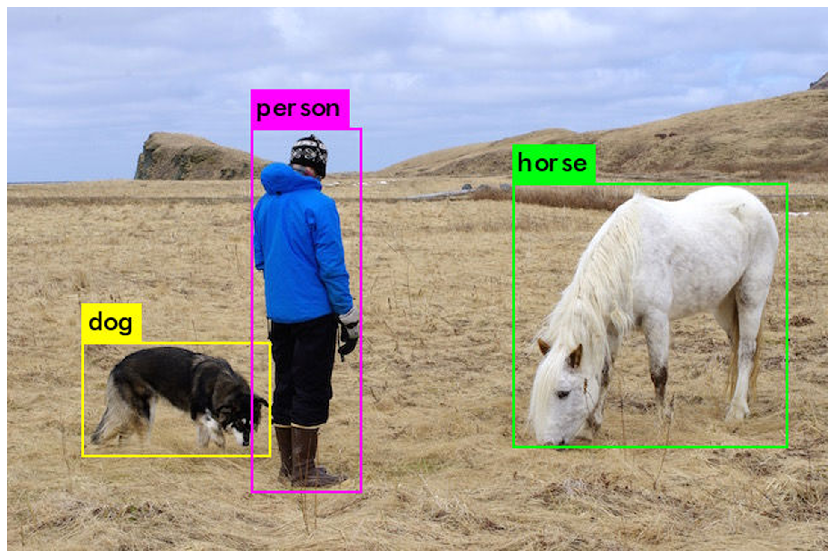

In [0]:
# Running the pretrained model
imShow('predictions.jpg')

In [0]:
!ls

3rdparty	darknet			include		       results
appveyor.yml	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet.py		LICENSE		       src
build		darknet_video.py	__MACOSX	       video_v2.sh
build.ps1	data			Makefile	       video_yolov3.sh
build.sh	data_for_colab		net_cam_v3.sh	       yolov3.weights
cfg		data_for_colab.zip	obj
cmake		image_yolov2.sh		predictions.jpg
CMakeLists.txt	image_yolov3.sh		README.md


## Model Training

Training the model for 1000 epcosh

In [0]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg data_for_colab/yolov3-tiny.conv.15 -dont_show

Streaming output truncated to the last 5000 lines.

 502: 1.282558, 1.340458 avg loss, 0.000064 rate, 2.045816 seconds, 32128 images
Loaded: 0.000061 seconds
v3 (mse loss, Normalizer: (iou: 0.750000, cls: 1.000000) Region 16 Avg (IOU: 0.414896, GIOU: 0.341728), Class: 0.887024, Obj: 0.114697, No Obj: 0.002419, .5R: 0.250000, .75R: 0.071429, count: 28, loss = 2.668012, class_loss = 0.741437, iou_loss = 1.926575
v3 (mse loss, Normalizer: (iou: 0.750000, cls: 1.000000) Region 23 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000553, .5R: -nan, .75R: -nan, count: 0, loss = 0.000864, class_loss = 0.000864, iou_loss = 0.000000
v3 (mse loss, Normalizer: (iou: 0.750000, cls: 1.000000) Region 16 Avg (IOU: 0.402214, GIOU: 0.318299), Class: 0.890311, Obj: 0.132650, No Obj: 0.002418, .5R: 0.310345, .75R: 0.000000, count: 29, loss = 1.996135, class_loss = 0.745758, iou_loss = 1.250376
v3 (mse loss, Normalizer: (iou: 0.750000, cls: 1.000000) Region 23 Avg (IOU: -nan, GIOU: -nan), Cla

In [0]:
ls

3rdparty/                  darknet*                __MACOSX/
appveyor.yml               DarknetConfig.cmake.in  Makefile
backup/                    darknet.py              net_cam_v3.sh*
bad.list                   darknet_video.py        obj/
build/                     data/                   predictions.jpg
build.ps1*                 data_for_colab/         README.md
build.sh*                  data_for_colab.zip      results/
cfg/                       image_yolov2.sh*        scripts/
chart.png                  image_yolov3.sh*        src/
chart_yolov3-tiny-obj.png  include/                video_v2.sh*
cmake/                     json_mjpeg_streams.sh*  video_yolov3.sh*
CMakeLists.txt             LICENSE                 yolov3.weights


## Testing and Results

Testing the model over test dataset and running the model over dew videos

In [0]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights ../Yolo-Training-GoogleColab/test.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF


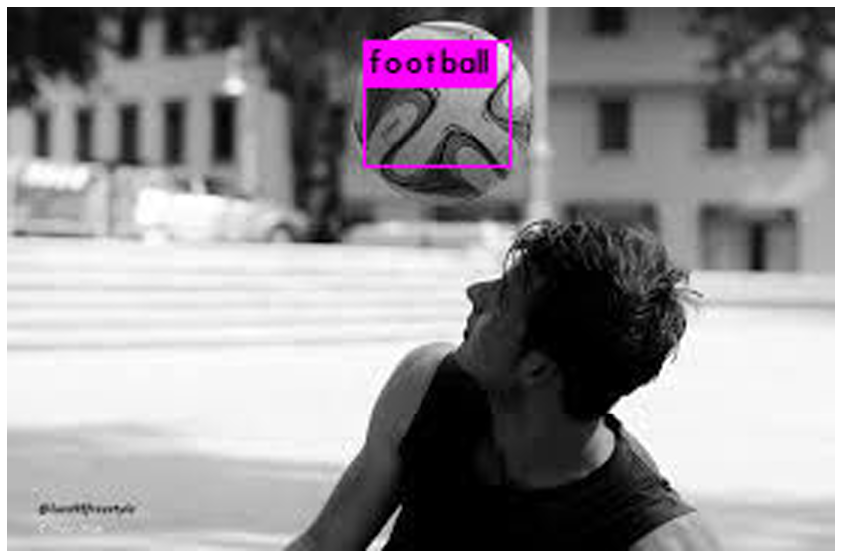

In [0]:
imShow('predictions.jpg')

In [0]:
!ls


3rdparty      chart_yolov3-tiny-obj.png  data_for_colab.zip	obj
appveyor.yml  cmake			 image_yolov2.sh	predictions.jpg
backup	      CMakeLists.txt		 image_yolov3.sh	README.md
bad.list      darknet			 include		results
build	      DarknetConfig.cmake.in	 json_mjpeg_streams.sh	scripts
build.ps1     darknet.py		 LICENSE		src
build.sh      darknet_video.py		 __MACOSX		video_v2.sh
cfg	      data			 Makefile		video_yolov3.sh
chart.png     data_for_colab		 net_cam_v3.sh		yolov3.weights


In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show test3.mp4 -i 0 -out_filename veout.avi

Streaming output truncated to the last 5000 lines.
Objects:

football: 44% 

FPS:97.7 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 63% 

FPS:95.6 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 44% 

FPS:96.1 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 96% 

FPS:93.9 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 96% 

FPS:90.6 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:


FPS:87.6 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:


FPS:89.7 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:


FPS:88.8 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:


FPS:93.0 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:


FPS:90.7 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:


FPS:88.1 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 29% 

FPS:87.5 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 26% 

FPS:89.3 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 81% 

FPS:86.0 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football: 98% 
football: 31% 

FPS:89.1 	 AVG_FPS:114.1

 cvWriteFrame 
Objects:

football:

In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show test_yolo.mp4 -i 0 -out_filename veout2.avi

Streaming output truncated to the last 5000 lines.

FPS:54.8 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:


FPS:54.8 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:


FPS:54.2 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:


FPS:55.0 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 26% 

FPS:55.3 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 32% 

FPS:55.5 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 38% 

FPS:55.8 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 36% 

FPS:55.3 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 64% 

FPS:54.6 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 39% 
football: 26% 

FPS:55.1 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 29% 

FPS:54.4 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 44% 
football: 28% 

FPS:54.8 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 45% 
football: 30% 

FPS:53.8 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:

football: 36% 
football: 31% 

FPS:53.0 	 AVG_FPS:52.2

 cvWriteFrame 
Objects:


FPS:52.0 	 AVG_FPS:52.2


In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show yolo_test2.mp4 -i 0 -out_filename veout3.avi

 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
Demo
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.00

In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_1000.weights  -dont_show test_yolo.mp4 -i 0 -out_filename veout4.avi

Streaming output truncated to the last 5000 lines.

FPS:56.8 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:


FPS:56.2 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:


FPS:55.7 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:


FPS:55.8 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:

football: 26% 

FPS:54.8 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:

football: 32% 

FPS:55.5 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:

football: 38% 

FPS:55.6 	 AVG_FPS:50.6

 cvWriteFrame 
Objects:

football: 36% 

FPS:55.4 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

football: 64% 

FPS:55.0 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

football: 39% 
football: 26% 

FPS:54.6 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

football: 29% 

FPS:55.4 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

football: 44% 
football: 28% 

FPS:54.6 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

football: 45% 
football: 30% 

FPS:53.3 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:

football: 36% 
football: 31% 

FPS:52.7 	 AVG_FPS:53.4

 cvWriteFrame 
Objects:


FPS:51.8 	 AVG_FPS:53.4


In [0]:
!ls

3rdparty		   darknet_video.py	  results
appveyor.yml		   data			  scripts
backup			   data_for_colab	  src
bad.list		   data_for_colab.zip	  test3.mp4
build			   image_yolov2.sh	  test_yolo.mp4
build.ps1		   image_yolov3.sh	  veout2.avi
build.sh		   include		  veout3.avi
cfg			   json_mjpeg_streams.sh  veout4.avi
chart.png		   LICENSE		  veout.avi
chart_yolov3-tiny-obj.png  __MACOSX		  video_v2.sh
cmake			   Makefile		  video_yolov3.sh
CMakeLists.txt		   net_cam_v3.sh	  yolo_test2.mp4
darknet			   obj			  yolov3.weights
DarknetConfig.cmake.in	   predictions.jpg
darknet.py		   README.md


In [0]:
download("veout4.avi")